In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf

#https://www.statsmodels.org/0.9.0/example_formulas.html

#Nếu y = ln(x) thì e^y = x

In [2]:
#Biến đổi Logarit

* Mô hình Linear:
    - $y = \beta_1 + \beta_2x + \epsilon$
    - Ta có: $\frac{\mathrm{d}y}{\mathrm{d}x} = \beta_2$
    - Giải thích: Tăng/giảm $x$ một <u>đơn vị</u> dẫn đến $y$ tăng/giảm $\beta_2$ <u>đơn vị</u>
    - *Ví dụ*: Giả sử bạn là một nhà sản xuất bánh mì và bạn quảng cáo sản phẩm của mình. Mô hình Linear có thể được sử dụng để dự đoán tăng trưởng doanh số bán hàng. Nếu bạn thêm 10 đô la vào ngân sách quảng cáo hàng tháng ($x$), và nếu hệ số $\beta_2$ là 0.5, thì bạn có thể kỳ vọng rằng doanh số bán hàng hàng tháng ($y$) sẽ tăng thêm 5 đơn vị.


* Mô hình Log-Linear:
    - $\ln y = \beta_1 + \beta_2x + \epsilon$
    - Ta có: $\frac{\mathrm{d}y}{\mathrm{d}x} = \frac{\mathrm{d}}{\mathrm{d}x}e^{\ln y} = \frac{\mathrm{d}}{\mathrm{d}x}e^{\beta_1 + \beta_2x + \epsilon} = y\beta_2 \Rightarrow \frac{\mathrm{d}y/y}{\mathrm{d}x} =\beta_2$
    - Giải thích: Tăng/giảm $x$ một <u>đơn vị</u> dẫn đến y tăng/giảm $\beta_2 \cdot 100\%$ ($\beta_2$ lần)
    - *Ví dụ*: Bạn quản lý một cửa hàng trực tuyến và muốn biết tăng số lượng sản phẩm ($x$) lên 20% sẽ ảnh hưởng đến tỷ lệ tăng trưởng doanh số bán hàng ($y$) bao nhiêu. Nếu mô hình Log-Linear cho thấy $\beta_2$ là 0.1, thì tăng sản phẩm lên 20% sẽ dự đoán tăng tỷ lệ tăng trưởng doanh số bán hàng lên 2% ($0.1 \times 20\%$).


* Mô hình Linear-Log:
    - $y = \beta_1 + \beta_2 \ln x + \epsilon$
    - Ta có: $\frac{\mathrm{d}y}{\mathrm{d}x} = \frac{\beta_2}{x} \Rightarrow \frac{\mathrm{d}y}{\mathrm{d}x/x} =\beta_2$
    - Giải thích: Tăng/giảm $x$ một <u>phần trăm</u> dẫn đến $y$ tăng/giảm $\beta_2/100$ đơn vị
    - *Ví dụ*: Bạn là một nhà đầu tư và muốn biết tăng 1% trong giá dầu thô ($x$) sẽ ảnh hưởng đến giá cổ phiếu của công ty dầu mỏ ($y$) bao nhiêu. Nếu mô hình Linear-Log cho thấy $\beta_2$ là 0.02, thì tăng giá dầu thô 1% sẽ dự đoán giá cổ phiếu tăng thêm 0.02% ($0.02 \times 1\%$).

* Mô hình Log-Log:
    - $\ln y = \beta_1 + \beta_2 \ln x + \epsilon$
    - Ta có: $\frac{\mathrm{d}y}{\mathrm{d}x} = \frac{\mathrm{d}}{\mathrm{d}x}e^{\ln y} = \frac{y}{x}\beta_2 \Rightarrow \frac{\mathrm{d}y/y}{\mathrm{d}x/x} =\beta_2$
    - Giải thích: Tăng/giảm $x$ một <u>phần trăm</u> dẫn đến y tăng/giảm $\beta_2 \%$
    - *Ví dụ*: Bạn là một nông dân và muốn biết tăng 5% trong lượng mưa hàng năm ($x$) sẽ ảnh hưởng đến sản lượng mùa màng ($y$) bao nhiêu. Nếu mô hình Log-Log cho thấy $\beta_2$ là 0.7, thì tăng lượng mưa 5% sẽ dự đoán tăng sản lượng mùa màng 3.5% ($0.7 \times 5\%$).

In [3]:
#Biến đổi Box-Cox

* Mô hình Linear:
    - $y = \beta_1 + \beta_2x + \epsilon$

* Mô hình Log:
    - $\ln y = \beta_1 + \beta_2x + \epsilon$

* Biến đổi Box-cox ($\frac{y^{\lambda} - 1}{\lambda}$):
    - Linear: $\frac{y^{\lambda} - 1}{\lambda} = y - 1$ khi $\lambda = 1$
    - Log: $\frac{y^{\lambda} - 1}{\lambda} \rightarrow \ln y$ khi $\lambda \rightarrow 0$

* Với dữ liệu cho trước, thì chúng ta kiểm chứng $\lambda = 0$ hay $\lambda = 1$?

In [4]:
#Tham khảo thêm: Cobb-Douglas Production Function

In [5]:
data = sm.datasets.get_rdataset("CPS1988", "AER")

In [6]:
df = sm.datasets.get_rdataset("CPS1988", "AER").data

In [7]:
df_cps = df[(df['experience'] > 1) & (df['education'] > 1)]

In [8]:
model_log_log = smf.ols(formula='np.log(wage) ~ np.log(education)',
                        data=df_cps).fit()
#print(model_log_log.summary())
#Adj. R-squared: 0.108

In [9]:
model_log_linear = smf.ols(formula='np.log(wage) ~ education',
                           data=df_cps).fit()
#print(model_log_linear.summary())
#Adj. R-squared: 0.131

In [10]:
model_linear_linear = smf.ols(formula='wage ~ education', data=df_cps).fit()
#print(model_linear_linear.summary())
#Adj. R-squared: 0.110

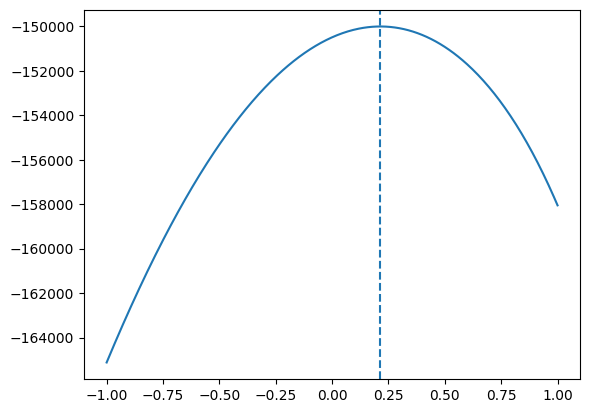

In [11]:
# [1] https://frost-lee.github.io/box-cox-linear-model/
# [2] https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/jacobian/v/the-jacobian-determinant
# Trên ngôn ngữ R thì các bạn chỉ cần gõ 1 dòng code để tìm ra tất cả lambda

X = sm.add_constant(df_cps['education'])
n = df_cps.shape[0]
sum_log_y = np.sum(np.log(df_cps['wage']))
lam = np.linspace(-1, 1, 500) # lambda
llk = np.empty(500)  # likelihood
for i in range(0, 500):
    lmod = sm.OLS(sp.stats.boxcox(df_cps['wage'], lam[i]), X).fit()
    llk[i] = -(n/2)*np.log(lmod.ssr/n) + (lam[i]-1)*sum_log_y
    # llk[i] tương đương với biểu thức số (14) trong reference

# ứng với mỗi lambda thì chúng ta đi tìm log likelyhood của OLS
# log likelyhood lớn nhất, mô hình phù hợp nhất, R-squared tập train lớn nhất
plt.plot(lam, llk)
i_max = llk.argmax()
best_lam = lam[i_max]
plt.axvline(lam[i_max], linestyle = 'dashed')
plt.show()

In [12]:
model_box_cox = smf.ols(formula='I((wage**best_lam - 1)/best_lam) ~ education', data=df_cps).fit()
#print(model_box_cox.summary())
#Adj. R-squared: 0.138

In [13]:
nd = pd.DataFrame(data={'education': np.linspace(df_cps['education'].min(), df_cps['education'].max(), num=200)})
predictions = pd.DataFrame(data={
    'education': nd['education'],
    'Log-Log': np.exp(model_log_log.predict(nd)),
    'Log-Linear': np.exp(model_log_linear.predict(nd)),
    'Linear-Linear': model_linear_linear.predict(nd),
    'Box-Cox': (model_box_cox.predict(nd)*best_lam + 1)**(1/best_lam)
})

predictions = pd.melt(predictions, id_vars='education', value_vars=['Linear-Linear', 'Log-Log', 'Log-Linear', 'Box-Cox'],
                      var_name='model', value_name='wage')
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html

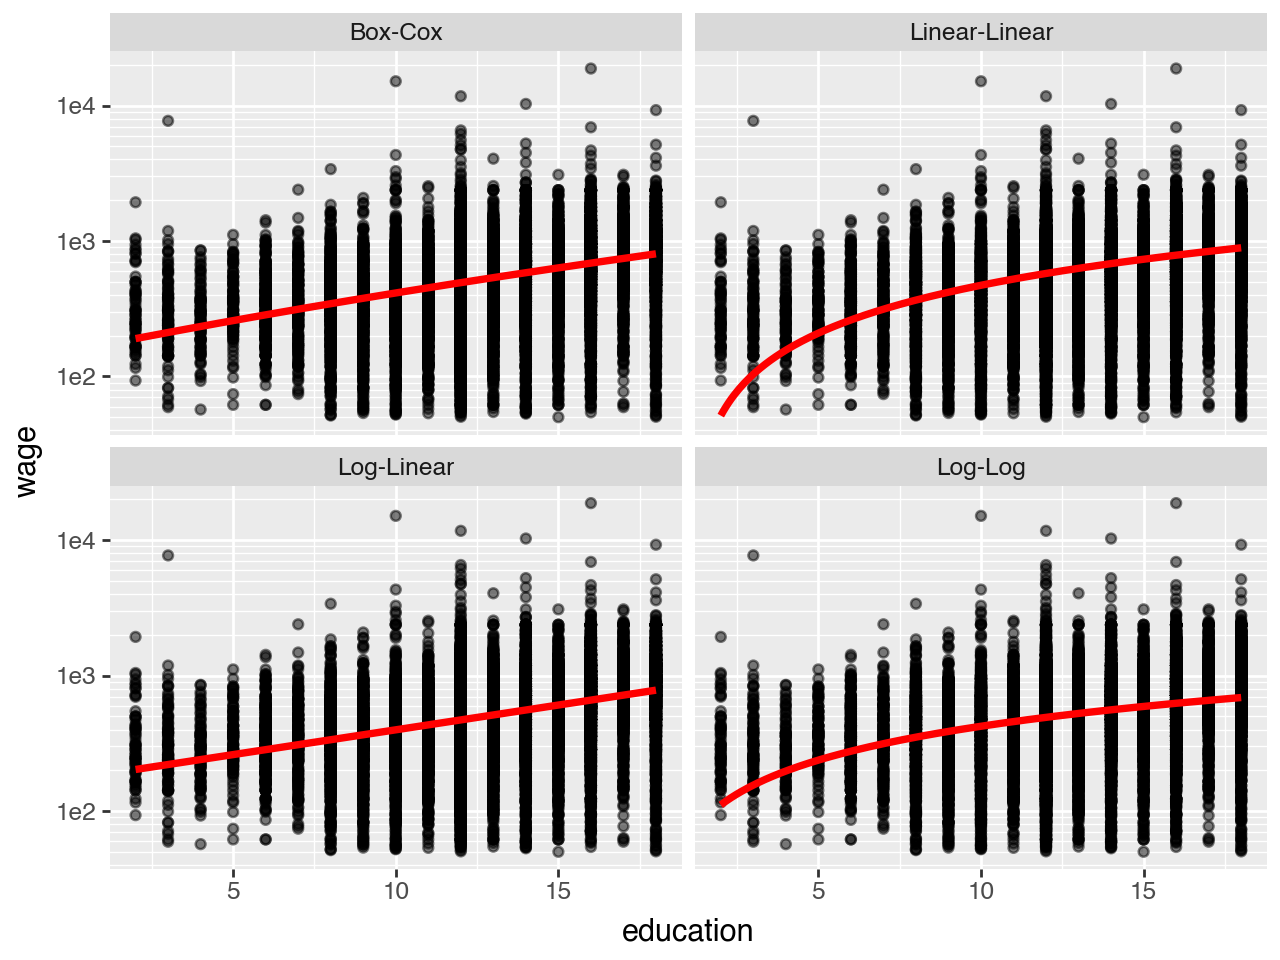

In [14]:
#https://plotnine.readthedocs.io/en/stable/index.html
#ggplot: thư viện vẽ biểu đồ trên R
#nếu như các bạn vẽ biểu đồ bằng matplotlib, thì các sẽ tốn rất nhiều thời gian để vẽ được

from plotnine import ggplot, aes, geom_point, geom_line, facet_wrap, scale_y_log10

# Create the base plot with the first dataset
plot = (ggplot(data=df_cps, mapping=aes(x='education', y='wage'))
        + geom_point(alpha=0.5)
        + geom_line(data=predictions, mapping=aes(x='education', y='wage', group='model'), inherit_aes=False, color='red', size=1.5)
        + facet_wrap('model')
        + scale_y_log10())

# Display the plot
plot